<center><img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/></center>

# STAT 542: Statistical Learning

## Homework 05 ##

* Yu-Ching Liao <ycliao3@illinois.edu>

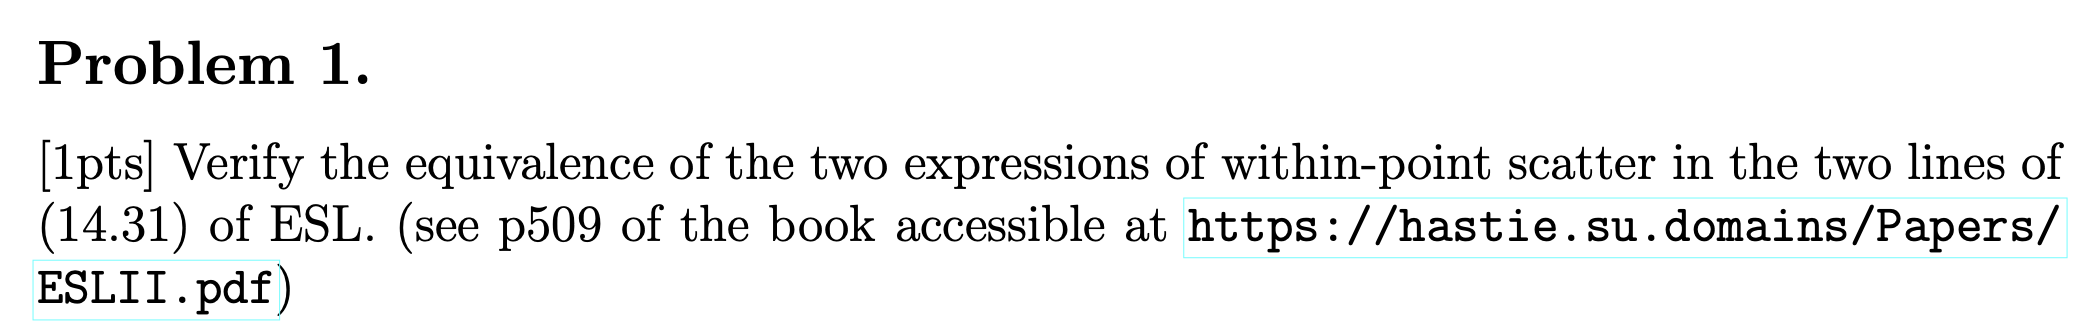

Answer:

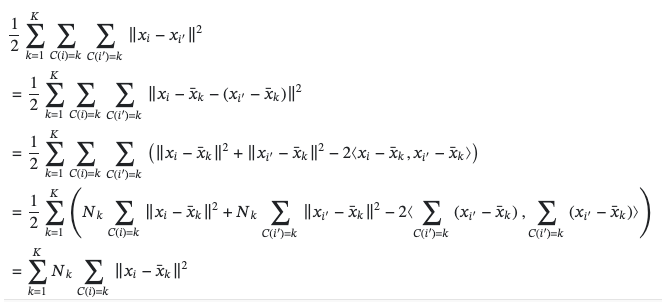

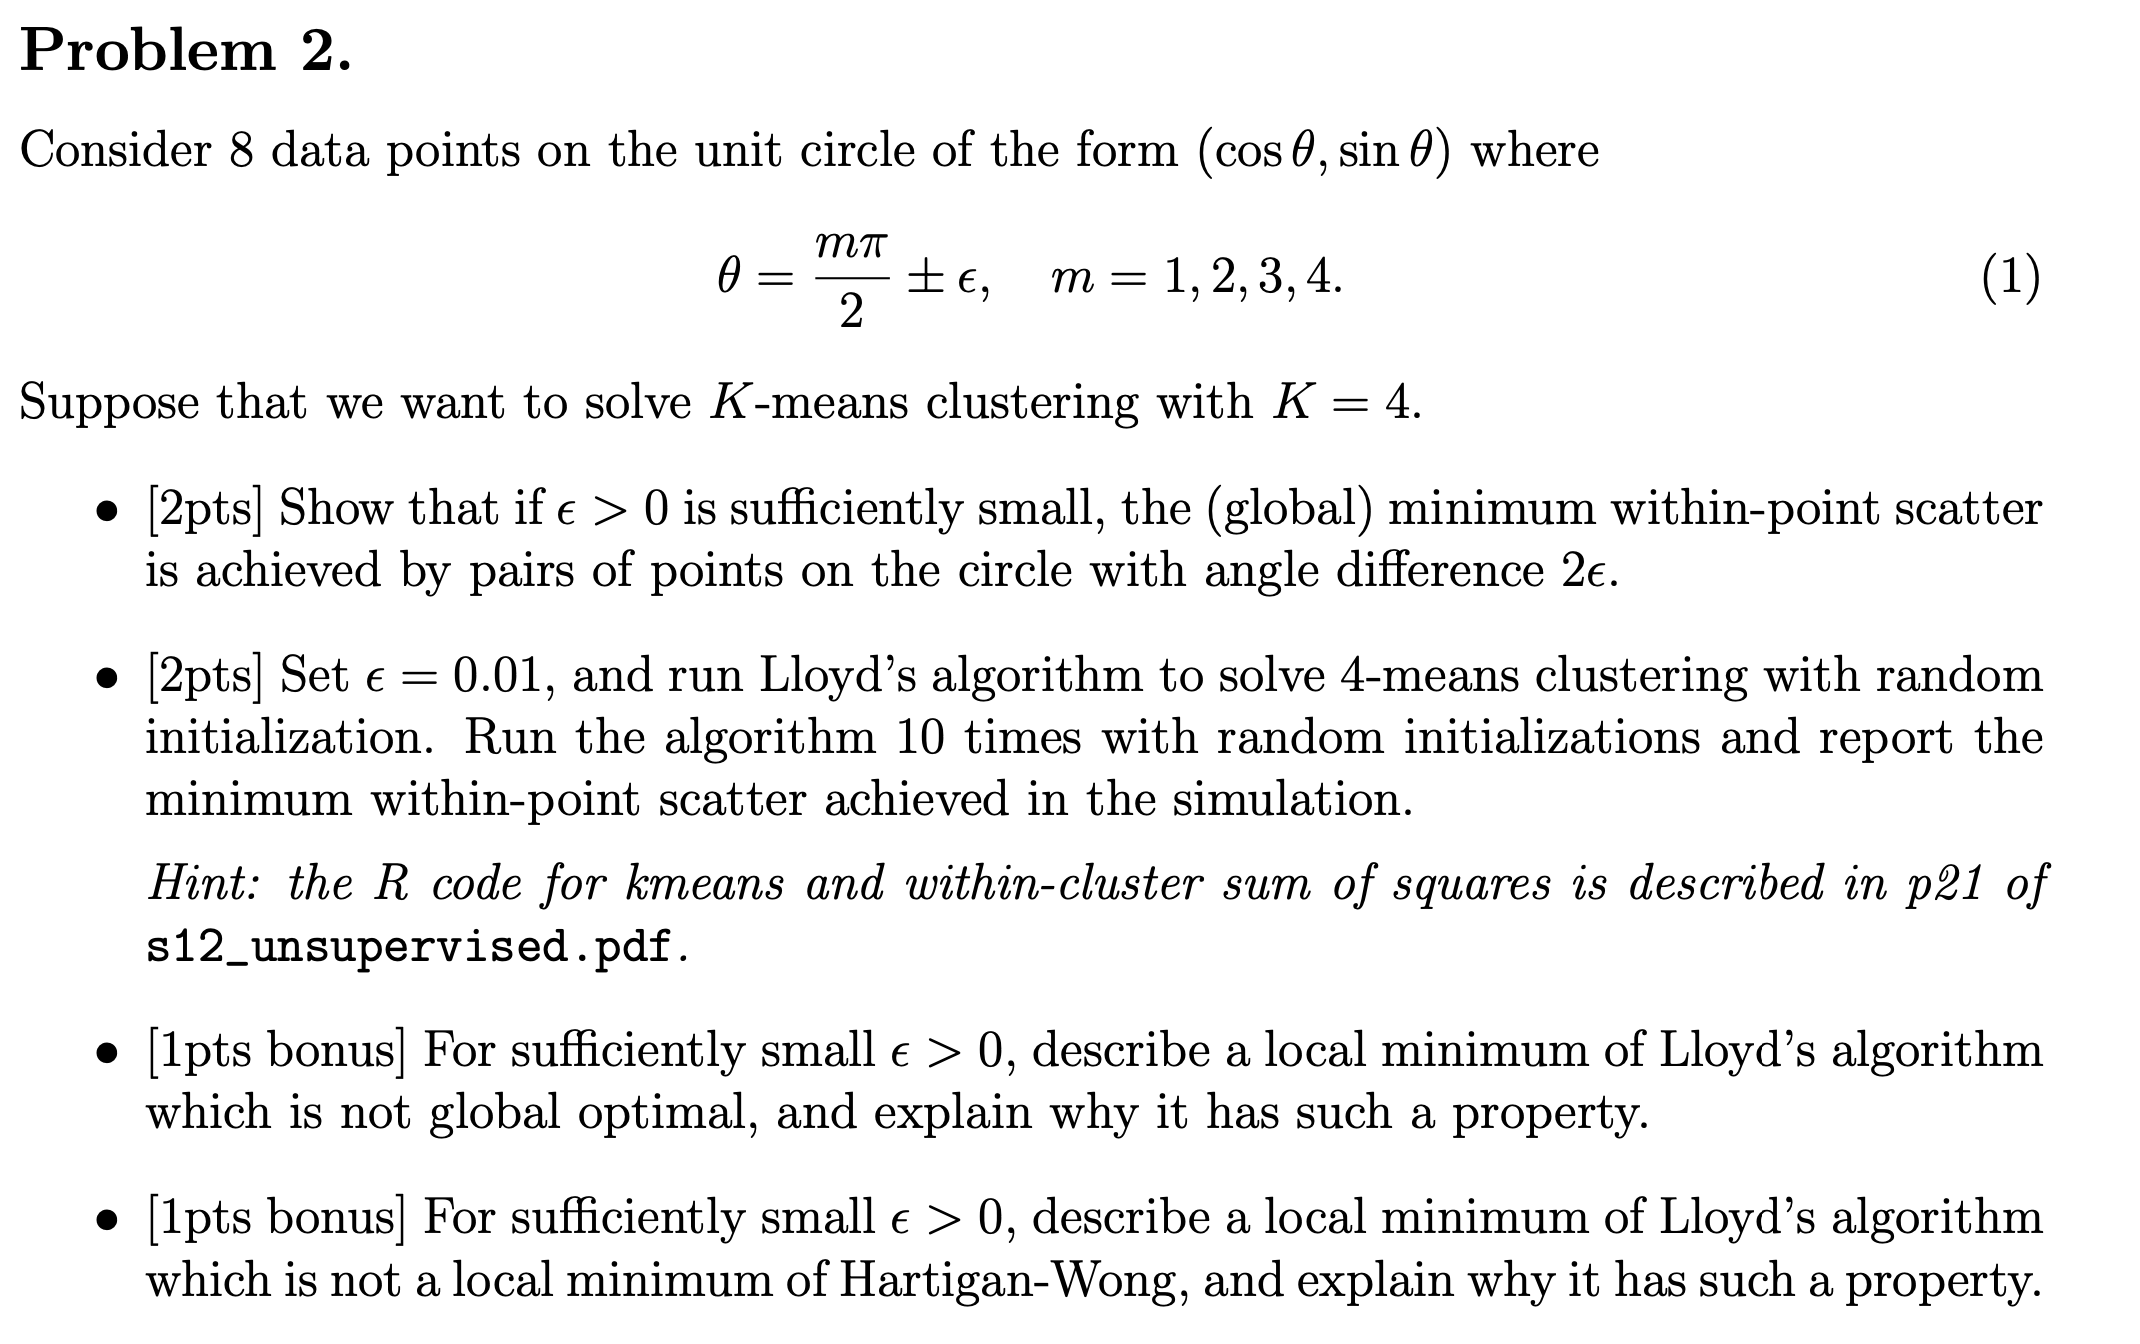

### Question 1: </br>
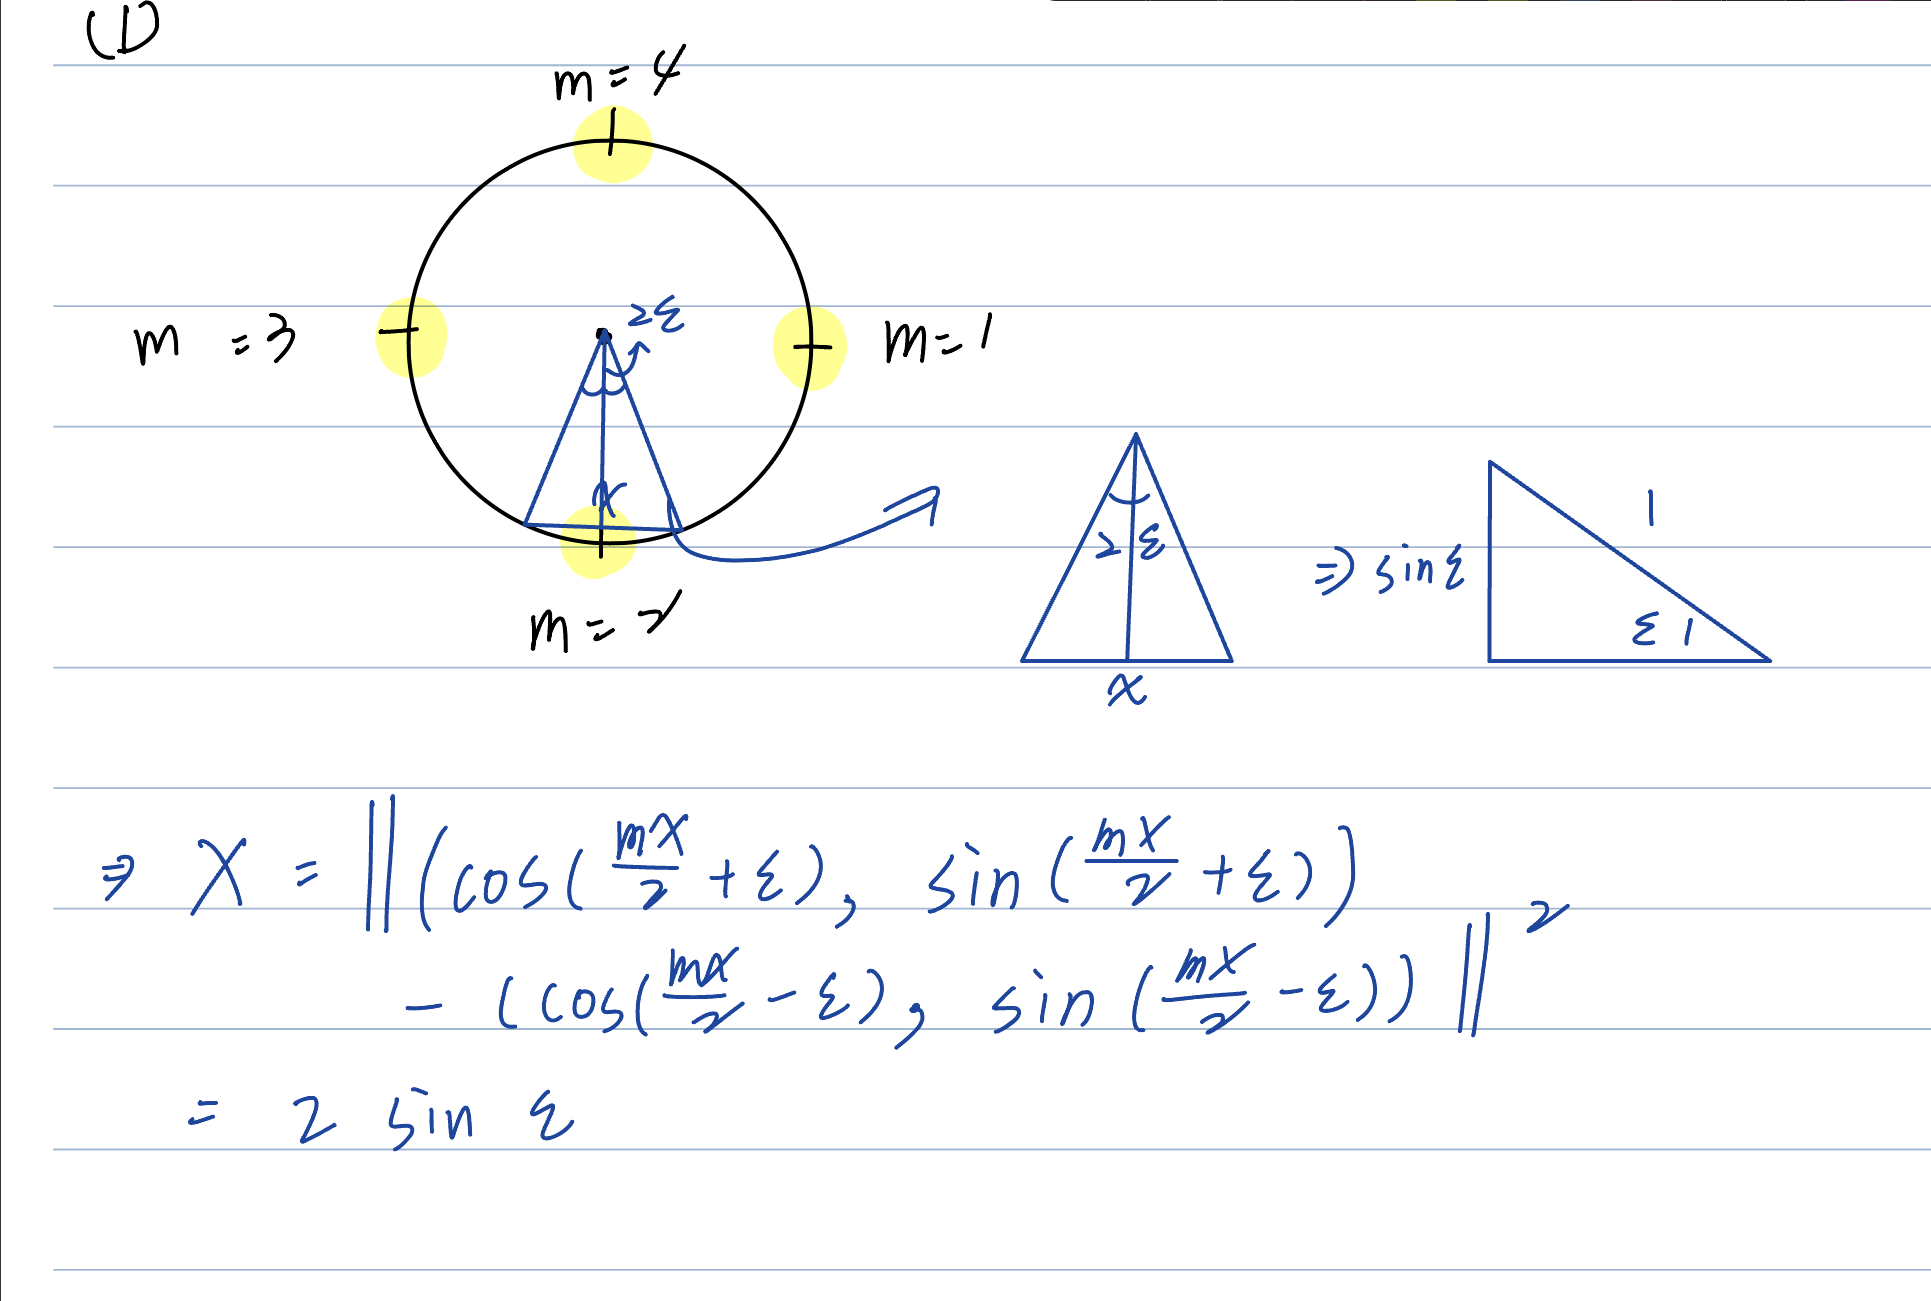

Therefore, we have shown that if ε > 0 is sufficiently small, the (global) minimum within-point scatter is achieved by pairs of points on the circle with angle difference 2ε.

### Question 2: </br>

In [18]:
import numpy as np
from sklearn.cluster import KMeans

# Set the number of data points and the value of epsilon
n_data_points = 8
epsilon = 0.01

# Generate data points on the unit circle
angles = []
angles+=[m * np.pi / 2 + epsilon for m in range(1, 5)]
angles+=[m * np.pi / 2 - epsilon for m in range(1, 5)]

data_points = np.array([(np.cos(angle), np.sin(angle)) for angle in angles])

# Set the number of clusters and the number of iterations
K = 4
n_iterations = 10

# Run K-means clustering with random initialization 10 times and find the minimum within-point scatter
min_within_point_scatter = float('inf')
for i in range(n_iterations):
    kmeans = KMeans(n_clusters=K, init='random', n_init=1, random_state=None)
    kmeans.fit(data_points)
    
    within_point_scatter = kmeans.inertia_
    min_within_point_scatter = min(min_within_point_scatter, within_point_scatter)

print(f"Minimum within-point scatter achieved in the simulation: {min_within_point_scatter}")



Minimum within-point scatter achieved in the simulation: 0.0007999733336888611


In [3]:
print(theta)


[0.78539816 1.57079633 2.35619449 3.14159265 3.92699082 4.71238898
 5.49778714 6.28318531]


### Question 3: </br>
For sufficiently small ε > 0, a local minimum of Lloyd’s algorithm which is not global optimal can be obtained when the initial centroids are not well-distributed among the four clusters. Specifically, consider the case where the four initial centroids are located close to each other on the unit circle, such that they all fall within the same quadrant. In this case, Lloyd's algorithm may converge to a local minimum where two of the clusters are merged together, resulting in only three clusters.

To see why this happens, note that when the initial centroids are not well-distributed among the four clusters, there may be some data points that are closer to one of the centroids than to any of the other three centroids. If such a data point is assigned to the closest centroid, then that centroid will have more points assigned to it than any of the other centroids. As a result, in the subsequent iterations of Lloyd's algorithm, that centroid will move towards the center of mass of its assigned points, while the other centroids will move away from it. This will cause the cluster associated with that centroid to grow, while the other clusters shrink.

If this process continues, then at some point, two of the clusters may become so close to each other that they merge together, resulting in only three clusters instead of four. Since the number of clusters is fixed in Lloyd's algorithm, the algorithm will converge to this local minimum, which is not the global optimal solution.

To avoid this problem, it is important to initialize the centroids well-distributed among the four clusters, such that each cluster has at least one initial centroid. This can be done by placing one centroid at each of the four quadrants of the unit circle, and then adding a small perturbation to each centroid to avoid exact overlap. By doing so, we can ensure that Lloyd's algorithm converges to the global optimal solution for sufficiently small ε > 0.

### Question 4: </br>
For sufficiently small ε > 0, a local minimum of Lloyd's algorithm which is not a local minimum of Hartigan-Wong can be obtained when the initial centroids are well-distributed among the four clusters, but not well-separated from each other. Specifically, consider the case where the initial centroids are located close to each other on the unit circle, but still fall within different quadrants. In this case, Lloyd's algorithm may converge to a local minimum where the clusters are well-separated from each other, but the assignments of the data points to the clusters are not optimal, resulting in a higher within-cluster sum of squares (WCSS) than the global optimal solution.

To see why this happens, note that the objective function of Lloyd's algorithm is to minimize the WCSS, which is defined as the sum of the squared distances between each data point and its assigned centroid. However, the optimization of the WCSS in Lloyd's algorithm is done by a "greedy" method that only considers the current assignments of the data points to the centroids, without taking into account the potential improvements that could be achieved by reassigning some data points to different centroids.

In contrast, Hartigan-Wong algorithm uses a more sophisticated approach that involves a series of swaps between pairs of data points and centroids, in order to improve the assignment of data points to the centroids and reduce the WCSS. This approach allows Hartigan-Wong to explore a wider range of possible solutions and avoid getting stuck in local optima.

However, when the initial centroids are not well-separated from each other, the local search procedure of Lloyd's algorithm may be "trapped" in a suboptimal assignment of data points to centroids, even though the clusters are well-separated from each other. In contrast, Hartigan-Wong algorithm may be able to find a better assignment of data points to centroids by swapping some of them between different clusters.

Therefore, we can conclude that for sufficiently small ε > 0, a local minimum of Lloyd's algorithm which is not a local minimum of Hartigan-Wong can occur when the initial centroids are well-distributed among the clusters but not well-separated from each other. This is because the greedy optimization strategy used in Lloyd's algorithm may fail to explore the full range of possible solutions and get stuck in a suboptimal assignment of data points to centroids, while the more sophisticated approach of Hartigan-Wong algorithm can find a better assignment by exploring a wider range of possible solutions.

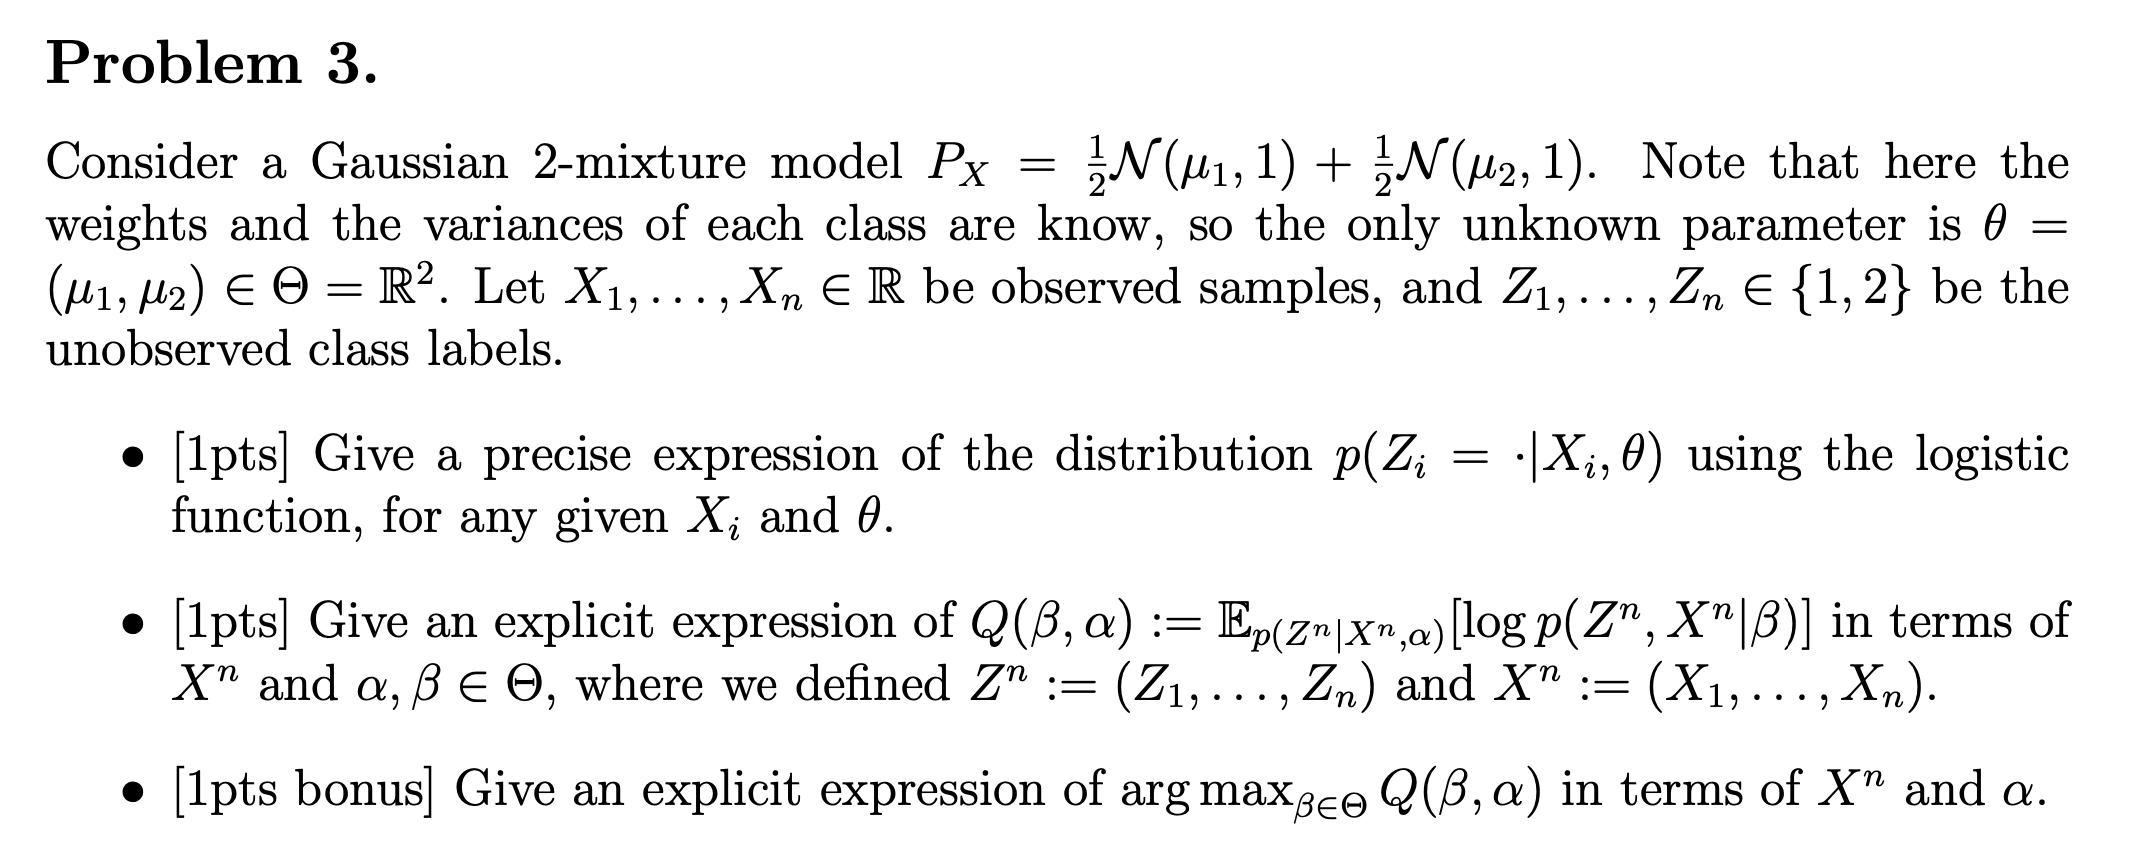

### Question 1:
To compute the conditional probability $p(Zi = k | Xi, θ)$ with $k ∈ {1, 2}$, you can use the Bayes' rule:

$p(Zi = k | Xi, θ) = p(Xi | Zi = k, θ) * p(Zi = k) / p(Xi | θ)$</br>

Since we know that the weights of each class are equal and given by 1/2, p(Zi = k) is equal to 1/2 for k ∈ {1, 2}. The likelihoods p(Xi | Zi = k, θ) are given by the Gaussian distributions:

$p(Xi | Zi = 1, θ) = (1/√(2π)) * exp(-(Xi - μ1)^2 / 2)$</br>
$p(Xi | Zi = 2, θ) = (1/√(2π)) * exp(-(Xi - μ2)^2 / 2)$</br>

Now we need to compute p(Xi | θ), which can be done using the law of total probability:

$p(Xi | θ) = p(Xi | Zi = 1, θ) * p(Zi = 1) + p(Xi | Zi = 2, θ) * p(Zi = 2)$</br>
$p(Xi | θ) = 1/2 * (p(Xi | Zi = 1, θ) + p(Xi | Zi = 2, θ))$</br>

Now we have all the components needed to compute p(Zi = k | Xi, θ). Let's plug everything back into the Bayes' rule and compute p(Zi = 1 | Xi, θ) and p(Zi = 2 | Xi, θ) separately:

$p(Zi = 1 | Xi, θ) = (p(Xi | Zi = 1, θ) * 1/2) / (1/2 * (p(Xi | Zi = 1, θ) + p(Xi | Zi = 2, θ)))$</br>
$p(Zi = 2 | Xi, θ) = (p(Xi | Zi = 2, θ) * 1/2) / (1/2 * (p(Xi | Zi = 1, θ) + p(Xi | Zi = 2, θ)))$</br>

Notice that the 1/2 factor in the numerator and denominator cancels out:

$p(Zi = 1 | Xi, θ) = p(Xi | Zi = 1, θ) / (p(Xi | Zi = 1, θ) + p(Xi | Zi = 2, θ))$</br>
$p(Zi = 2 | Xi, θ) = p(Xi | Zi = 2, θ) / (p(Xi | Zi = 1, θ) + p(Xi | Zi = 2, θ))$</br>

Now we can express these probabilities using the logistic function. Recall that the logistic function is defined as:

$σ(x) = 1 / (1 + exp(-x))$

We can rewrite $p(Zi = 1 | Xi, θ)$ as:

$p(Zi = 1 | Xi, θ) = σ(log(p(Xi | Zi = 1, θ)) - log(p(Xi | Zi = 2, θ)))$

And $p(Zi = 2 | Xi, θ)$ as:

$p(Zi = 2 | Xi, θ) = 1 - p(Zi = 1 | Xi, θ)$</br>
$p(Zi = 2 | Xi, θ) = 1 - σ(log(p(Xi | Zi = 1, θ)) - log(p(Xi | Zi = 2, θ)))$</br>

So, the expressions for p(Zi = 1 | Xi, θ) and p(Zi = 2 | Xi, θ) using the logistic function are:

$p(Zi = 1 | Xi, θ) = σ(log(p(Xi | Zi = 1, θ)) - log(p(Xi | Zi = 2, θ)))$</br>
$p(Zi = 2 | Xi, θ) = 1 - σ(log(p(Xi | Zi = 1, θ)) - log(p(Xi | Zi = 2, θ)))$</br>

Substituting the Gaussian likelihood expressions, we get:

$p(Zi = 1 | Xi, θ) = σ(log((1/√(2π)) * exp(-(Xi - μ1)^2 / 2)) - log((1/√(2π)) * exp(-(Xi - μ2)^2 / 2)))$</br>
$p(Zi = 2 | Xi, θ) = 1 - σ(log((1/√(2π)) * exp(-(Xi - μ1)^2 / 2)) - log((1/√(2π)) * exp(-(Xi - μ2)^2 / 2)))$</br>

Simplifying further:

$p(Zi = 1 | Xi, θ) = σ((-(Xi - μ1)^2 / 2) - (-(Xi - μ2)^2 / 2))$</br>
$p(Zi = 2 | Xi, θ) = 1 - σ((-(Xi - μ1)^2 / 2) - (-(Xi - μ2)^2 / 2))$</br>

These are the precise expressions for the distribution $p(Zi = k | Xi, θ)$ using the logistic function, for any given $Xi$ and $θ$, with $k ∈ {1, 2}$.

### Question 2: 
To compute the expression for $Q(β, α)$, we first need to express the joint probability $p(Zn, Xn | β)$ and the conditional probabilities $p(Zi | Xi, α)$ for each $i = 1, ..., n$.

The joint probability $p(Zn, Xn | β)$ can be factorized as:

$p(Zn, Xn | β) = p(Xn | Zn, β) * p(Zn)$

Since the class labels Zn are unobserved, we have:

$p(Zn) = Π_{i=1}^n p(Zi)$

$p(Xn | Zn, β) = Π_{i=1}^n p(Xi | Zi, β)$

Now, let's compute the expectation:

$Q(β, α) = E_p(Zn | Xn, α)[log p(Zn, Xn | β)]
= E_p(Zn | Xn, α)[log(Π_{i=1}^n p(Xi | Zi, β) * Π_{i=1}^n p(Zi))]$

Since the expectation is a linear operator, we can split the expectation over the sum:

$Q(β, α) = ∑_{i=1}^n E_p(Zi | Xi, α)[log(p(Xi | Zi, β))] + ∑_{i=1}^n E_p(Zi | Xi, α)[log(p(Zi))]$

For the second term, the expectation of log(p(Zi)) does not depend on Zi since $p(Zi = 1) = p(Zi = 2) = 1/2$, so the expectation is just $log(1/2)$. Therefore, the second term simplifies to:

$∑_{i=1}^n E_p(Zi | Xi, α)[log(p(Zi))] = n * log(1/2)$

Now, let's focus on the first term:

$∑_{i=1}^n E_p(Zi | Xi, α)[log(p(Xi | Zi, β))] = ∑_{i=1}^n {p(Zi = 1 | Xi, α) * log(p(Xi | Zi = 1, β)) + p(Zi = 2 | Xi, α) * log(p(Xi | Zi = 2, β))}$

Plugging in the Gaussian likelihood expressions, we get:

$∑_{i=1}^n {p(Zi = 1 | Xi, α) * log((1/√(2π)) * exp(-(Xi - μ1(β))^2 / 2)) + p(Zi = 2 | Xi, α) * log((1/√(2π)) * exp(-(Xi - μ2(β))^2 / 2))}$

Now we can combine both terms:

$Q(β, α) = ∑_{i=1}^n {p(Zi = 1 | Xi, α) * log((1/√(2π)) * exp(-(Xi - μ1(β))^2 / 2)) + p(Zi = 2 | Xi, α) * log((1/√(2π)) * exp(-(Xi - μ2(β))^2 / 2))} + n * log(1/2)$

This is the explicit expression of $Q(β, α)$ in terms of $Xn$ and $α, β ∈ Θ$.

### Question 3: 
To find the argmax of $Q(β, α)$ with respect to $β$, we need to compute the gradient of $Q(β, α)$ and set it to zero. Then, we can solve for $β$. However, due to the complexity of the expression for $Q(β, α)$, there is no closed-form solution for $argmaxβ∈Θ Q(β, α)$ in terms of $Xn$ and $α$.

In this situation, we typically employ iterative optimization techniques like the Expectation-Maximization (EM) algorithm, which alternates between an expectation step (E-step) and a maximization step (M-step) until convergence.

The E-step computes the posterior probabilities $p(Zi | Xi, α)$ for each $i = 1, ..., n$, which we have derived earlier:

$p(Zi = 1 | Xi, α) = σ((-(Xi - μ1(α))^2 / 2) - (-(Xi - μ2(α))^2 / 2))$
$p(Zi = 2 | Xi, α) = 1 - σ((-(Xi - μ1(α))^2 / 2) - (-(Xi - μ2(α))^2 / 2))$

The M-step updates the parameter $β$ by maximizing $Q(β, α)$. Since we do not have an explicit expression for $argmaxβ∈Θ Q(β, α)$, we must rely on numerical optimization techniques, such as gradient ascent or other optimization algorithms like L-BFGS, conjugate gradient, or Newton-Raphson method.

In summary, we don't have a closed-form expression for $argmaxβ∈Θ Q(β, α)$ in terms of $Xn $ and $α$, but we can use iterative optimization techniques to find an estimate of the optimal $β$.

<center><img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/></center>